<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Deep_Learning/15_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow ImageDataGenerator를 이용한 Augmentation

# Load Image

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:, ..., tf.newaxis]
X_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

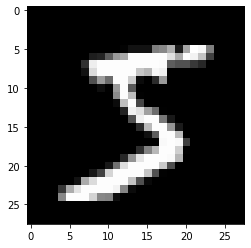

In [3]:
image = X_train[0, ..., 0]

plt.imshow(image, 'gray')
plt.show()

# Augmentation 이란?

이미지를 훈련시키려고 하는데, 수집한 이미지나 가지고 있는 이미지가 조금 부족한 경우가 있을 수 있다.

* 각 이미지에 약간의 **변형을 추가** ( = Augmentation을 줬다)
* 제한된 이미지에서 여러가지 효과를 줄 수 있도록 하는 것이다.
* 좌우반전, shift, zoom in / zoom out, rotation 등의 효과를 ImageDataGenerator를 이용해 줄 수 있다.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Augmentation 활용

datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

Augmentation을 주기 위해서는 데이터의 형식을 CNN 레이어에 들어가는 형식으로 맞춰 줘야 한다.

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
inputs = X_train[0]
inputs = inputs[tf.newaxis, ...]
inputs.shape

(1, 28, 28, 1)

In [8]:
image = next(iter(datagen.flow(inputs)))

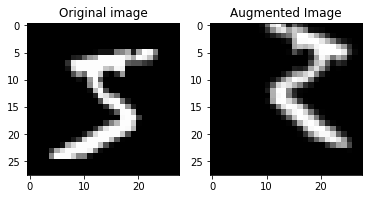

In [9]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')
plt.title("Original image")

plt.subplot(122)
plt.title("Augmented Image")
plt.imshow(np.squeeze(image), 'gray')
plt.show()

## ImageDataGenerator의 변형 옵션

* width_shift_range : 좌우 이동 범위 설정
* height_shift_range : 상하 이동 범위 설정
* brightness_range : 밝기 조절 설정
* zoom_range : 확대 / 축소 범위 설정
* horizontal_flip : 좌우반전 여부( bool )
* vertical_flip : 상하반전 여부( bool )
* **rescale : 픽셀 전처리 단위 설정**
* preprocessing_function : opencv 등 외부 라이브러리를 이용한 전처리 할 때 사용

## Rescale 시 주의 사항
train_data_gen에 rescale 옵션을 줬으면 test_data_gen에도 반드시 rescale이 되어야 한다.

In [10]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1./255. # 픽셀 단위를 1/255로 하겠다.
)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255. # 반드시 넣어 줄 것!
)